In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as stats
mJ = 317.8

In [17]:
planets = pd.read_csv("./data/gasGiantData.csv")

hotJupiters = planets.loc[planets["pl_type"] == "HJ"]
warmJupiters = planets.loc[planets["pl_type"] == 'WJ']
coldJupiters = planets.loc[planets["pl_type"] == "CJ"]
warmColdJupiters = pd.concat((warmJupiters, coldJupiters))
gasGiants = pd.concat((warmColdJupiters, hotJupiters))

loneGasGiants = gasGiants.loc[gasGiants["sy_pnum"] == 1]

"""
Companion Type is a product of primes so that I can identify the categories a companion belongs to with a single number
2: Super Earths
3: Hot Saturns
5: Cold Saturns
7: Hot Jupiters
11: Warm Jupiters
13: Cold Jupiters
"""

seCompanions = planets.loc[(planets["companion_type"] % 2 == 0)]
hjCompanions = planets.loc[(planets["companion_type"] % 7 == 0)]
wcjCompanions = planets.loc[(planets["companion_type"] % 11 == 0) | (planets["companion_type"] % 13 == 0)]


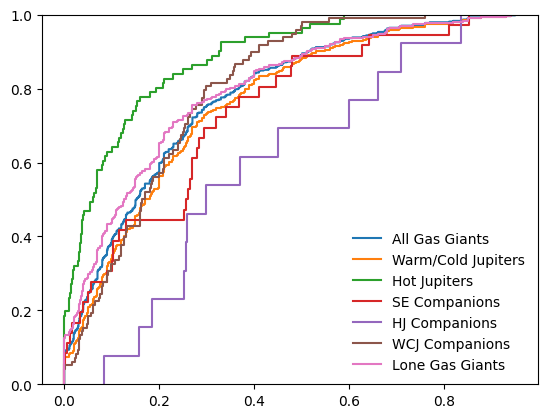

In [18]:
fig, ax = plt.subplots(1,1)

ax.ecdf(gasGiants["pl_orbeccen"].dropna(), label = "All Gas Giants")
ax.ecdf(warmColdJupiters["pl_orbeccen"].dropna(), label = "Warm/Cold Jupiters")
ax.ecdf(hotJupiters["pl_orbeccen"].dropna(), label = "Hot Jupiters")
ax.ecdf(seCompanions["pl_orbeccen"].dropna(), label = "SE Companions")
ax.ecdf(hjCompanions["pl_orbeccen"].dropna(), label = "HJ Companions")
ax.ecdf(wcjCompanions["pl_orbeccen"].dropna(), label = "WCJ Companions")
ax.ecdf(loneGasGiants["pl_orbeccen"].dropna(), label= "Lone Gas Giants")
ax.legend(frameon = False)



In [21]:
stats.kstest(gasGiants["pl_orbeccen"].dropna(), hotJupiters["pl_orbeccen"].dropna())

KstestResult(statistic=0.27427676432651554, pvalue=3.621752190212831e-05, statistic_location=0.07, statistic_sign=-1)